# Lab 2: Soft-DTW

* Author: Romain Tavenard (@rtavenar)
* License: CC-BY-NC-SA

A lab session from a course on Machine Learning for Time Series at ENSAI.
One can find lecture notes for this course [there](https://rtavenar.github.io/ml4ts_ensai/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tslearn.metrics import soft_dtw, soft_dtw_alignment

## Impact of the $\gamma$ parameter

Let us define time series `x0` and `x1` as follows:

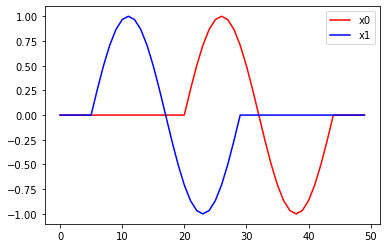

In [ ]:
size = 50
x0 = np.zeros((size, ))
x0[20:20+size//2] = np.sin(np.linspace(0, 2 * np.pi, size // 2))

x1 = np.zeros((size, ))
x1[5:5+size//2] = np.sin(np.linspace(0, 2 * np.pi, size // 2))

plt.figure()
plt.plot(x0, 'r-', label='x0')  # red
plt.plot(x1, 'b-', label='x1')  # blue
plt.legend()
plt.show()

**Question #1.** Using the [`soft_dtw_alignment`](https://tslearn.readthedocs.io/en/latest/gen_modules/metrics/tslearn.metrics.soft_dtw_alignment.html)
function from `tslearn`, study the impact of parameter `\gamma` on soft-alignment matrices $A_\gamma$.

_NB:_ `plt.imshow(m)` allows one to view matrix `m` represented as an image.

## Gradient Descent on a SoftDTW objective

The following function computes gradients of $\text{soft-}DTW^\gamma(x, y)$ with respect to $x$
for univariate time series:

In [ ]:
import tslearn

def soft_dtw_grad(x, y, gamma):    
    D = tslearn.metrics.SquaredEuclidean(x.reshape((-1, 1)), y.reshape((-1, 1)))
    sdtw = tslearn.metrics.SoftDTW(D, gamma=gamma)
    sdtw.compute()
    A_gamma = sdtw.grad()
    grad = D.jacobian_product(A_gamma)
    return grad

Also, for the next few questions, you might want to use the following function that generates an 
animation to help visualize gradient descent.

In [ ]:
from celluloid import Camera
from IPython.display import HTML

def animate_gradient_descent(list_of_successive_time_series, show_x1=False):
    fig = plt.figure()
    camera = Camera(fig)
    for x in list_of_successive_time_series:
        plt.plot(x.ravel(), 'k-')
        plt.plot(x0, 'r-', label='x0')
        if show_x1:
            plt.plot(x1, 'b-', label='x1')
        camera.snap()    
    anim = camera.animate()
    plt.close()
    return HTML(anim.to_jshtml())

**Question #2.** Implement a gradient-descent scheme to minimize (with respect to $x$) the quantity 
$\text{soft-}DTW^\gamma(x, x_0)$ where $x_0$ is the array `x0` defined above.

In [ ]:
eta = 1e-1
epochs = 100
gamma = .1

list_x = [.1 * np.random.randn(size, 1)]

for e in range(epochs):
    # TODO

animate_gradient_descent(list_x)

**Question #3.** Use the code above to estimate a soft-DTW barycenter of `x0` and `x1` via 
gradient-descent optimization.

In [ ]:
eta = 1e-1
epochs = 100
gamma = 10.

list_x = [np.random.randn(size, 1)]

for e in range(epochs):
    # TODO

animate_gradient_descent(list_x, show_x1=True)